## 各月份檔案合併,與拿出想要欄位

In [120]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
from glob import glob

files = glob('./各月資料_時間，地區，難易度/*.csv')
df = pd.concat((pd.read_csv(file,usecols=['時間','地區','難易度'],\
                            dtype={'時間':object,'地區':object,'難易度': object})\
                for file in files),ignore_index=True)

## 轉換時間格式為datatime64

In [121]:
df['時間']=df['時間'].astype('datetime64').dt.strftime('%Y-%m-%d')

## 依日加總各爬山總人次

In [122]:
# 爬山總人數趨勢
totalNumber = df.groupby('時間').count()
totalNumber

,地區,難易度
時間,,
2020-01-01,32882,32882
2020-01-02,10909,10909
2020-01-03,15479,15479
2020-01-04,48455,48455
2020-01-05,30372,30372
...,...,...
2020-12-27,20918,20918
2020-12-28,6748,6748
2020-12-29,5811,5811


## 將資料改成統一格式,方便合併

In [123]:
total_number_df = totalNumber[['難易度','地區']].rename(columns={'難易度':'total'}).drop('地區',axis=1)

total_number_df

,total
時間,
2020-01-01,32882
2020-01-02,10909
2020-01-03,15479
2020-01-04,48455
2020-01-05,30372
...,...
2020-12-27,20918
2020-12-28,6748
2020-12-29,5811


## 整年的登山人次，觀察登山趨勢

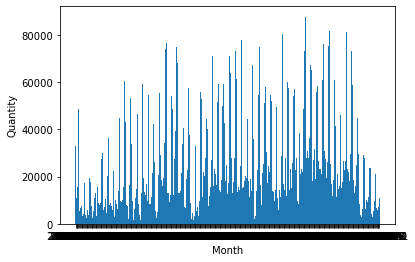

In [126]:
x = totalNumber['地區']
y = totalNumber.index

plt.bar(totalNumber.index,height=totalNumber['地區'],width=1)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

## 合併地區與難易度，篩選各特徵值組合

In [127]:
# north_easy

north_easy = df[(df['地區']=='north') & (df['難易度']=='easy')]
north_easy['north_easy'] = 1
north_easy = north_easy[['時間','north_easy']]
north_easy = north_easy.groupby('時間').sum()
north_easy

<ipython-input-127-7a6544d932d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_easy['north_easy'] = 1


,north_easy
時間,
2020-01-01,13243
2020-01-02,5878
2020-01-03,7285
2020-01-04,22649
2020-01-05,21349
...,...
2020-12-27,7303
2020-12-28,1253
2020-12-29,1637


In [128]:
#north_normal

north_normal = df[(df['地區']=='north') & (df['難易度']=='normal')]
north_normal['north_normal'] = 1
north_normal = north_normal[['時間','north_normal']]
north_normal = north_normal.groupby('時間').sum()
north_normal

<ipython-input-128-4670ecf9c5bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_normal['north_normal'] = 1


,north_normal
時間,
2020-01-01,1477
2020-01-02,1751
2020-01-03,262
2020-01-04,1726
2020-01-05,806
...,...
2020-12-27,1472
2020-12-28,1683
2020-12-29,326


In [129]:
#north_hard

north_hard = df[(df['地區']=='north') & (df['難易度']=='hard')]
north_hard['north_hard'] = 1
north_hard = north_hard[['時間','north_hard']]
north_hard = north_hard.groupby('時間').sum()
north_hard

<ipython-input-129-88f578c3f1c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_hard['north_hard'] = 1


,north_hard
時間,
2020-01-01,381
2020-01-02,365
2020-01-03,994
2020-01-04,319
2020-01-13,31
...,...
2020-12-27,415
2020-12-28,160
2020-12-29,187


In [130]:
# south_easy

south_easy = df[(df['地區']=='south') & (df['難易度']=='easy')]
south_easy['south_easy'] = 1
south_easy = south_easy[['時間','south_easy']]
south_easy = south_easy.groupby('時間').sum()
south_easy

<ipython-input-130-955e1ed488aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_easy['south_easy'] = 1


,south_easy
時間,
2020-01-01,1886
2020-01-02,581
2020-01-03,932
2020-01-04,3704
2020-01-05,2597
...,...
2020-12-26,2004
2020-12-27,3387
2020-12-28,89


In [131]:
#south_normal

south_normal = df[(df['地區']=='south') & (df['難易度']=='normal')]
south_normal['south_normal'] = 1
south_normal = south_normal[['時間','south_normal']]
south_normal = south_normal.groupby('時間').sum()
south_normal

<ipython-input-131-6aaef4be3c47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_normal['south_normal'] = 1


,south_normal
時間,
2020-01-01,600
2020-01-06,217
2020-01-07,635
2020-01-08,748
2020-01-09,107
...,...
2020-12-26,1084
2020-12-27,797
2020-12-28,669


In [132]:
#south_hard

south_hard = df[(df['地區']=='south') & (df['難易度']=='hard')]
south_hard['south_hard'] = 1
south_hard = south_hard[['時間','south_hard']]
south_hard = south_hard.groupby('時間').sum()
south_hard

<ipython-input-132-60e39178b642>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_hard['south_hard'] = 1


,south_hard
時間,
2020-01-01,14
2020-01-07,3
2020-01-08,26
2020-01-10,29
2020-01-11,9
...,...
2020-12-26,4
2020-12-27,8
2020-12-28,85


In [133]:
# central_easy

central_easy = df[(df['地區']=='central') & (df['難易度']=='easy')]
central_easy['central_easy'] = 1
central_easy = central_easy[['時間','central_easy']]
central_easy = central_easy.groupby('時間').sum()
central_easy

<ipython-input-133-e6eb371e4d18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_easy['central_easy'] = 1


,central_easy
時間,
2020-01-01,8910
2020-01-02,616
2020-01-03,2544
2020-01-04,11258
2020-01-05,2832
...,...
2020-12-27,3252
2020-12-28,1214
2020-12-29,699


In [134]:
#central_normal

central_normal = df[(df['地區']=='central') & (df['難易度']=='normal')]
central_normal['central_normal'] = 1
central_normal = central_normal[['時間','central_normal']]
central_normal = central_normal.groupby('時間').sum()
central_normal

<ipython-input-134-3656ba88f127>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_normal['central_normal'] = 1


,central_normal
時間,
2020-01-01,627
2020-01-02,39
2020-01-03,127
2020-01-04,1425
2020-01-05,1295
...,...
2020-12-27,883
2020-12-28,721
2020-12-29,406


In [135]:
#central_hard

central_hard = df[(df['地區']=='central') & (df['難易度']=='hard')]
central_hard['central_hard'] = 1
central_hard = central_hard[['時間','central_hard']]
central_hard = central_hard.groupby('時間').sum()
central_hard

<ipython-input-135-c600e3bd3f52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_hard['central_hard'] = 1


,central_hard
時間,
2020-01-04,34
2020-01-05,182
2020-01-19,69
2020-02-08,217
2020-02-11,151
...,...
2020-12-19,63
2020-12-20,6
2020-12-26,245


In [136]:
# east_easy

east_easy = df[(df['地區']=='east') & (df['難易度']=='easy')]
east_easy['east_easy'] = 1
east_easy = east_easy[['時間','east_easy']]
east_easy = east_easy.groupby('時間').sum()
east_easy

<ipython-input-136-b25e214bfd55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_easy['east_easy'] = 1


,east_easy
時間,
2020-01-01,2577
2020-01-02,401
2020-01-03,671
2020-01-04,5162
2020-01-05,101
...,...
2020-12-27,1013
2020-12-28,364
2020-12-29,2085


In [137]:
#east_normal

east_normal = df[(df['地區']=='east') & (df['難易度']=='normal')]
east_normal['east_normal'] = 1
east_normal = east_normal[['時間','east_normal']]
east_normal = east_normal.groupby('時間').sum()
east_normal

<ipython-input-137-73394b967c6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_normal['east_normal'] = 1


,east_normal
時間,
2020-01-01,1918
2020-01-02,1142
2020-01-03,2100
2020-01-04,1590
2020-01-05,803
...,...
2020-12-27,1401
2020-12-28,201
2020-12-29,365


In [138]:
#east_hard

east_hard = df[(df['地區']=='east') & (df['難易度']=='hard')]
east_hard['east_hard'] = 1
east_hard = east_hard[['時間','east_hard']]
east_hard = east_hard.groupby('時間').sum()
east_hard

<ipython-input-138-c219cc35e076>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_hard['east_hard'] = 1


,east_hard
時間,
2020-01-01,1249
2020-01-02,136
2020-01-03,564
2020-01-04,588
2020-01-05,407
...,...
2020-12-27,948
2020-12-28,294
2020-12-29,106


## 將銷售端與登山軌跡資料疊合

In [139]:
new_df = pd.read_csv('corr_10.csv')
new_df = new_df.rename(columns={'Unnamed: 0':'time'})
new_df['time'] = new_df['time'].astype('datetime64[ns]').dt.strftime('%Y-%m-%d')
new_df = new_df.set_index('time')
print(new_df)

            Snow Peak  Fjallraven  Hilleberg  MAMMUT  100mountain  mont-bell  \
time                                                                           
2020-01-01      40185       48893        0.0   88365        19534      28634   
2020-01-02      47640       19017        0.0   15410         6987      13619   
2020-01-03      32784       27280    11898.0   16520         8359       7100   
2020-01-04      18878       54679        0.0   47980         9616      31620   
2020-01-05      17874       37662    55794.0   22161         6136      13813   
...               ...         ...        ...     ...          ...        ...   
2020-12-27     135099       82404        0.0  149947        53395      80540   
2020-12-28      53582       76679        0.0   19907        27185      23860   
2020-12-29      82110       59021    35200.0   85262        63977      73425   
2020-12-30      61578       99432    24569.0   82177        50482      89574   
2020-12-31      46761       56172       

## 疊合結果，儲存csv檔

In [140]:
# featureList = ['north','south','central','east','easy','medium','difficult']

new_df =  pd.concat([new_df,north_easy],axis=1)
new_df =  pd.concat([new_df,north_normal],axis=1)
new_df =  pd.concat([new_df,north_hard],axis=1)
new_df =  pd.concat([new_df,south_easy],axis=1)
new_df =  pd.concat([new_df,south_normal],axis=1)
new_df =  pd.concat([new_df,south_hard],axis=1)
new_df =  pd.concat([new_df,central_easy],axis=1)
new_df =  pd.concat([new_df,central_normal],axis=1)
new_df =  pd.concat([new_df,central_hard],axis=1)
new_df =  pd.concat([new_df,east_easy],axis=1)
new_df =  pd.concat([new_df,east_normal],axis=1)
new_df =  pd.concat([new_df,east_hard],axis=1)
# new_df =  pd.concat([new_df,medium],axis=1)
# new_df =  pd.concat([new_df,difficult],axis=1)
# new_df =  pd.concat([new_df,easy],axis=1)
new_df =  pd.concat([new_df,total_number_df],axis=1)
new_df = new_df.fillna(0)
new_df
new_df.to_csv('corr_all_2.csv')

In [141]:
df=pd.read_csv('corr_all_2.csv')
df

,時間,Snow Peak,Fjallraven,Hilleberg,MAMMUT,100mountain,mont-bell,Zamberlan,MysteryRanch,始祖鳥 Arcteryx,...,south_easy,south_normal,south_hard,central_easy,central_normal,central_hard,east_easy,east_normal,east_hard,total
0,2020-01-01,40185,48893,0.0,88365,19534,28634,14443.0,34755.0,23125.0,...,1886.0,600.0,14.0,8910.0,627.0,0.0,2577.0,1918.0,1249.0,32882
1,2020-01-02,47640,19017,0.0,15410,6987,13619,0.0,0.0,35180.0,...,581.0,0.0,0.0,616.0,39.0,0.0,401.0,1142.0,136.0,10909
2,2020-01-03,32784,27280,11898.0,16520,8359,7100,5100.0,27577.0,30420.0,...,932.0,0.0,0.0,2544.0,127.0,0.0,671.0,2100.0,564.0,15479
3,2020-01-04,18878,54679,0.0,47980,9616,31620,28300.0,2970.0,25530.0,...,3704.0,0.0,0.0,11258.0,1425.0,34.0,5162.0,1590.0,588.0,48455
4,2020-01-05,17874,37662,55794.0,22161,6136,13813,8550.0,10990.0,0.0,...,2597.0,0.0,0.0,2832.0,1295.0,182.0,101.0,803.0,407.0,30372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,135099,82404,0.0,149947,53395,80540,41150.0,44507.0,76833.0,...,3387.0,797.0,8.0,3252.0,883.0,39.0,1013.0,1401.0,948.0,20918
362,2020-12-28,53582,76679,0.0,19907,27185,23860,37980.0,12960.0,29260.0,...,89.0,669.0,85.0,1214.0,721.0,15.0,364.0,201.0,294.0,6748
363,2020-12-29,82110,59021,35200.0,85262,63977,73425,73130.0,1530.0,92220.0,...,0.0,0.0,0.0,699.0,406.0,0.0,2085.0,365.0,106.0,5811
364,2020-12-30,61578,99432,24569.0,82177,50482,89574,44870.0,29680.0,133492.0,...,1048.0,1135.0,4.0,475.0,474.0,0.0,409.0,735.0,603.0,7280
